# Linear Regression Implementation

In this homework, you need to implement LR algorithm.
* Generate data
* Implement LinearRegression class methods
* Visualize results

### Imports

In [151]:
import numpy as np 
import matplotlib.pyplot as plt

#### 1. Generate data
* Generate 200 points uniform randomly in range [0,1] and assign it to X (keep random seed)
* Fix b_0 and b_1
* Generate Y line with X, b_0 and b_1
* Add random noise from normal distribution, with (0,0.4) (keep random seed)
* Plot results
* Concatenate ones in X

In [152]:
#code here
np.random.seed(42)
x = np.random.uniform(0,1,200)
b_0 = 2
b_1 = 8
Y = b_0 + b_1*x
eps = np.random.normal(0,0.4,200)
Y = Y + eps


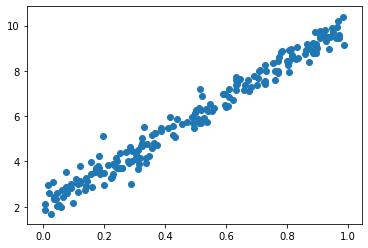

In [153]:
plt.scatter(x,Y)

In [154]:
x = x.reshape(200,1)
x=np.insert(x,0,1,axis=1)
x

array([[1.        , 0.37454012],
       [1.        , 0.95071431],
       [1.        , 0.73199394],
       [1.        , 0.59865848],
       [1.        , 0.15601864],
       [1.        , 0.15599452],
       [1.        , 0.05808361],
       [1.        , 0.86617615],
       [1.        , 0.60111501],
       [1.        , 0.70807258],
       [1.        , 0.02058449],
       [1.        , 0.96990985],
       [1.        , 0.83244264],
       [1.        , 0.21233911],
       [1.        , 0.18182497],
       [1.        , 0.18340451],
       [1.        , 0.30424224],
       [1.        , 0.52475643],
       [1.        , 0.43194502],
       [1.        , 0.29122914],
       [1.        , 0.61185289],
       [1.        , 0.13949386],
       [1.        , 0.29214465],
       [1.        , 0.36636184],
       [1.        , 0.45606998],
       [1.        , 0.78517596],
       [1.        , 0.19967378],
       [1.        , 0.51423444],
       [1.        , 0.59241457],
       [1.        , 0.04645041],
       [1.

In [155]:
np.random.seed(46)
x_test = np.random.uniform(0,1,200)
b_0_test = 3
b_1_test = 6
Y_test = b_0_test + b_1_test*x_test
eps = np.random.normal(0,0.4,200)
Y_test = Y_test + eps

In [156]:
x_test = x_test.reshape(200,1)
x_test=np.insert(x_test,0,1,axis=1)
x_test

array([[1.        , 0.78383235],
       [1.        , 0.63483371],
       [1.        , 0.24904309],
       [1.        , 0.75807586],
       [1.        , 0.31307694],
       [1.        , 0.93723736],
       [1.        , 0.04286545],
       [1.        , 0.4408672 ],
       [1.        , 0.91272229],
       [1.        , 0.45500392],
       [1.        , 0.50793434],
       [1.        , 0.08490795],
       [1.        , 0.42634979],
       [1.        , 0.74571696],
       [1.        , 0.8670814 ],
       [1.        , 0.32366583],
       [1.        , 0.1040744 ],
       [1.        , 0.80210805],
       [1.        , 0.39483195],
       [1.        , 0.62776809],
       [1.        , 0.03598854],
       [1.        , 0.29990785],
       [1.        , 0.04765322],
       [1.        , 0.37221108],
       [1.        , 0.2624152 ],
       [1.        , 0.99052621],
       [1.        , 0.39514535],
       [1.        , 0.30753926],
       [1.        , 0.22110114],
       [1.        , 0.49402502],
       [1.

#### Implement main LinearRegression class

In [192]:
class LinearRegression:
    """
    Linear Regression Class
    You need to implement LR algorithm with 2 different methods(analytical sol. and Gradient Descent)

    """

    def __init__(self):
        """
        Init method
        """
        self.betta = None
        self.alpha = None

    def fit_least_squares(self, X, Y):
        """
        Main fit method.
        Method takes X, Y parameters, find optimal bettas(with analytical solution) and return it
        :param X: (np.array,n*p) features
        :param Y: (np.array,n*1) target variable
        :return: betta (np.array,p*1) 
        """
        self.betta =  np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))
        return self.betta
         

    def fit_gradient_descent(self, X, Y, alpha, delta):
        """
        Fit with gradient descent optimizer
        Method takes X, Y and method parameters, find optimal bettas(with gradient descent) and return it
        :param X: (np.array,n*p) features
        :param Y: (np.array,n*1) target
        :param alpha: (float) learning rate
        :param delta: (int) threshold for minimum difference between betta_i and betta_i+1
        :return: betta (np.array,p*1) 
        """
        beta_n = np.array([0,0])
        los = ((X@ beta_n-Y)@ X)/len(X)
        beta_n_plus_1 = beta_n - alpha*los
        while np.linalg.norm(beta_n_plus_1-beta_n)>delta:
            los = ((X@ beta_n_plus_1-Y)@ X)/len(X)
            beta_n = beta_n_plus_1
            beta_n_plus_1 = beta_n - alpha*los
        self.betta = beta_n_plus_1
        return beta_n_plus_1
            
        
        

    def predict(self, X):
        """
        Make prediction with fitted bettas 
        :param X: (np.array,n*p) features
        :return: Y_pred (np.array,n*1) predictions
        """
        Y_pred = np.matmul(X,self.betta)
        return Y_pred
        

    def loss(self, X, Y):
        """
        Method for calculation current loss
        Need to implement Mean Square Error Loss
        :param X: (np.array,n*p) features
        :param Y: (np.array,n*1) target
        :return: (float) Mean Squared Error Loss
        """
        los = ((X@self.betta-Y)@ X)/len(X)
        return los

    def plot_line(self, X, Y):
        """
        Method plots data points and approximated lines for both methods(in one figure)
        :return: None 
        """
        fig, ax = plt.subplots()
        Y_pred = self.predict(X)
        X = np.delete(X,0,axis=1)
        X = X.reshape(200,1)
        ax.scatter(X,Y)
        ax.plot(X,Y_pred,color='red')



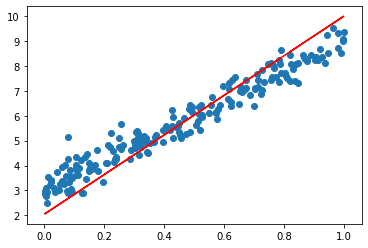

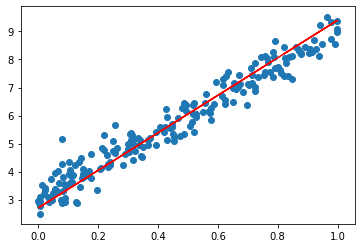

In [194]:
model1 = LinearRegression()
model1.fit_least_squares(x,Y)
model1.loss(x_test,Y_test)
model1.predict(x_test)
model1.plot_line(x_test,Y_test)

model2 = LinearRegression()
model2.fit_gradient_descent(x,Y,0.1,0.01)
model2.loss(x_test,Y_test)
model2.predict(x_test)
model2.plot_line(x_test,Y_test)






